# Importing all necessary libraries

In [6]:
from sklearn import linear_model
from sklearn import metrics
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import pandas as pd
import numpy as np
 
#from __future__ import absolute_import
from pandas_profiling import ProfileReport
import seaborn as sns
import hvplot.pandas
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from sklearnex import patch_sklearn 
patch_sklearn()
from sklearn.preprocessing import LabelEncoder
#Hide warnings
import warnings
warnings.filterwarnings('ignore')
#!pip install mplcyberpunk &> /dev/null #hide pip install outputs
#import mplcyberpunk
#plt.style.use("cyberpunk")
from termcolor import colored

import matplotlib.pyplot as plt
# Set plot preference
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# reading csv and printing first 5 rows of data


In [5]:
# reading in dataset

df = pd.read_csv('UK-HPI-full-file-2022-05.csv')
df.shape

(136934, 54)

In [3]:

print(colored("Successfully read...", "green"))
df.head().style.background_gradient(cmap = "summer")

Successfully read...


In [4]:
print(colored("Successfully read...", "green"))
df.tail().style.background_gradient(cmap = "summer")

Successfully read...


# dropping duplicate rows

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136934 entries, 0 to 136933
Data columns (total 54 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    136934 non-null  object 
 1   RegionName              136934 non-null  object 
 2   AreaCode                136934 non-null  object 
 3   AveragePrice            136934 non-null  float64
 4   Index                   136934 non-null  float64
 5   IndexSA                 4599 non-null    float64
 6   1m%Change               136491 non-null  float64
 7   12m%Change              131894 non-null  float64
 8   AveragePriceSA          4599 non-null    float64
 9   SalesVolume             132435 non-null  float64
 10  DetachedPrice           130637 non-null  float64
 11  DetachedIndex           130637 non-null  float64
 12  Detached1m%Change       130228 non-null  float64
 13  Detached12m%Change      125753 non-null  float64
 14  SemiDetachedPrice   

In [6]:
df=df.drop_duplicates(keep='last')
df=df.reset_index(drop=True)

In [7]:
#shape of data
df.shape

(136934, 54)

In [8]:
#checking if dataset contains any null value
df.isnull().sum()

Date                           0
RegionName                     0
AreaCode                       0
AveragePrice                   0
Index                          0
IndexSA                   132335
1m%Change                    443
12m%Change                  5040
AveragePriceSA            132335
SalesVolume                 4499
DetachedPrice               6297
DetachedIndex               6297
Detached1m%Change           6706
Detached12m%Change         11181
SemiDetachedPrice           6285
SemiDetachedIndex           6285
SemiDetached1m%Change       6694
SemiDetached12m%Change     11169
TerracedPrice               6258
TerracedIndex               6258
Terraced1m%Change           6667
Terraced12m%Change         11142
FlatPrice                   5956
FlatIndex                   5956
Flat1m%Change               6366
Flat12m%Change             10852
CashPrice                  85934
CashIndex                  85934
Cash1m%Change              86340
Cash12m%Change             90806
CashSalesV

#profile = ProfileReport(df, title = 'Pandas Profiling Report', html={'style':{'full_width':True}})


In [9]:
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

In [10]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [11]:
(missing_value_df.tail(40))

column_name  percent_missing
SemiDetachedPrice            SemiDetachedPrice         4.589802
SemiDetachedIndex            SemiDetachedIndex         4.589802
SemiDetached1m%Change    SemiDetached1m%Change         4.888486
SemiDetached12m%Change  SemiDetached12m%Change         8.156484
TerracedPrice                    TerracedPrice         4.570085
TerracedIndex                    TerracedIndex         4.570085
Terraced1m%Change            Terraced1m%Change         4.868769
Terraced12m%Change          Terraced12m%Change         8.136767
FlatPrice                            FlatPrice         4.349541
FlatIndex                            FlatIndex         4.349541
Flat1m%Change                    Flat1m%Change         4.648955
Flat12m%Change                  Flat12m%Change         7.924986
CashPrice                            CashPrice        62.755780
CashIndex                            CashIndex        62.755780
Cash1m%Change                    Cash1m%Change        63.052273
Cash12m%Change                  Cash12m%Change        66.313699
CashSalesVolume                CashSalesVolume        63.352418
MortgagePrice                    MortgagePrice        62.755780
MortgageIndex                    MortgageIndex        62.755780
Mortgage1m%Change            Mortgage1m%Change        63.052273
Mortgage12m%Change          Mortgage12m%Change        66.313699
MortgageSalesVolume        MortgageSalesVolume        63.351688
FTBPrice                              FTBPrice        62.466590
FTBIndex                              FTBIndex        62.466590
FTB1m%Change                      FTB1m%Change        62.763083
FTB12m%Change                    FTB12m%Change        66.024508
FOOPrice                              FOOPrice        62.755780
FOOIndex                              FOOIndex        62.755780
FOO1m%Change                      FOO1m%Change        63.052273
FOO12m%Change                    FOO12m%Change        66.313699
NewPrice                              NewPrice         4.954942
NewIndex                              NewIndex         4.954942
New1m%Change                      New1m%Change         5.254356
New12m%Change                    New12m%Change         8.530387
NewSalesVolume                  NewSalesVolume         5.214191
OldPrice                              OldPrice         4.948369
OldIndex                              OldIndex         4.948369
Old1m%Change                      Old1m%Change         5.247784
Old12m%Change                    Old12m%Change         8.523814
OldSalesVolume                  OldSalesVolume         4.958593

<AxesSubplot:>

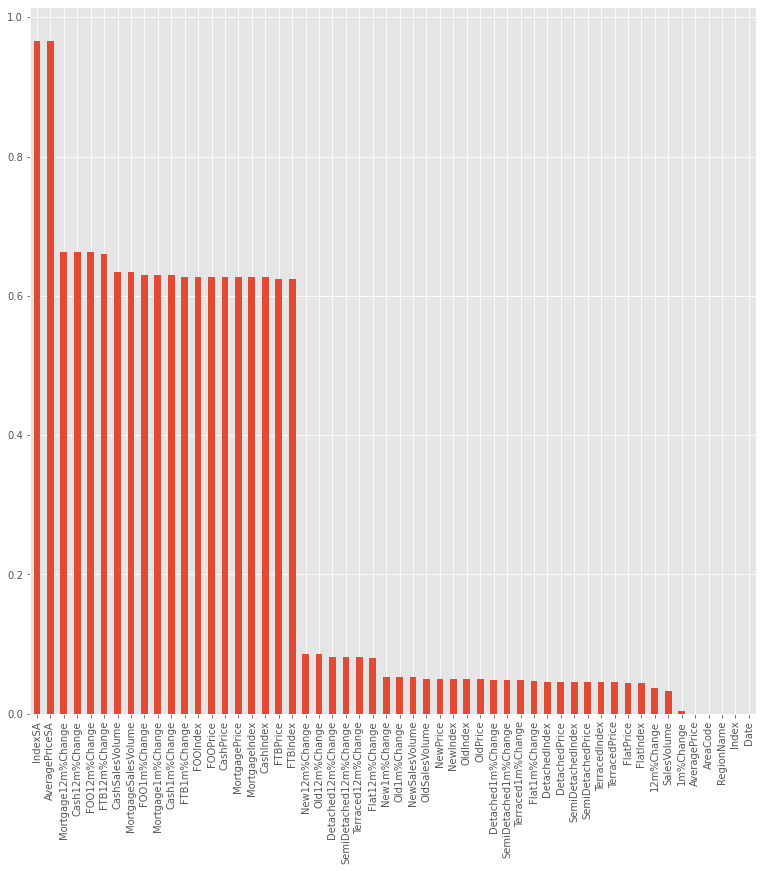

In [12]:
Miss_val = df.isna().sum()/df.shape[0]
Miss_val.sort_values(ascending=False, inplace=True)
Miss_val
plt.figure(figsize=(13,13))
Miss_val.plot.bar()

In [13]:
import datetime as dt
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
def get_date(x):
    return dt.datetime(x.year, x.day, x.month)

df["Date"] = df["Date"].apply(get_date)

In [14]:
df.set_index("Date", inplace = True)

In [15]:
#df.info()

In [16]:
df.drop(["FTBIndex","FTBPrice", "MortgageSalesVolume", 'MortgagePrice', 'MortgageIndex', 'Mortgage1m%Change','CashIndex', 'Cash1m%Change', 'Cash12m%Change', 'CashSalesVolume','IndexSA', 'FTB1m%Change', 'FTB12m%Change', 'FOOPrice', 'FOOIndex', 'FOO1m%Change','FOO12m%Change','1m%Change',
'AveragePriceSA','TerracedIndex','SemiDetachedIndex','DetachedIndex','Terraced1m%Change','SemiDetached1m%Change','SemiDetached12m%Change',
'Detached12m%Change','Detached1m%Change','12m%Change','Index','FlatIndex','Flat1m%Change','Flat12m%Change','TerracedIndex','Terraced1m%Change','Terraced12m%Change'], axis=1)

RegionName   AreaCode  AveragePrice  SalesVolume  \
Date                                                                         
2004-01-01             Aberdeenshire  S12000034   81693.66964        388.0   
2004-02-01             Aberdeenshire  S12000034   81678.76231        326.0   
2004-03-01             Aberdeenshire  S12000034   83525.09702        453.0   
2004-04-01             Aberdeenshire  S12000034   84333.67900        571.0   
2004-05-01             Aberdeenshire  S12000034   86379.95396        502.0   
...                              ...        ...           ...          ...   
2022-01-01  Yorkshire and The Humber  E12000003  194613.98340       4132.0   
2022-02-01  Yorkshire and The Humber  E12000003  198106.89690       4761.0   
2022-03-01  Yorkshire and The Humber  E12000003  197783.68610       4367.0   
2022-04-01  Yorkshire and The Humber  E12000003  200544.94640          NaN   
2022-05-01  Yorkshire and The Humber  E12000003  204834.82090          NaN   

            DetachedPrice  SemiDetachedPrice  TerracedPrice     FlatPrice  \
Date                                                                        
2004-01-01    122490.0641        70563.15784    55319.63336   48016.07412   
2004-02-01    121280.8840        70804.42408    55720.07531   49030.18133   
2004-03-01    123395.4269        72689.07253    57362.85925   50349.44771   
2004-04-01    122334.0258        74484.23119    59193.39722   51736.22329   
2004-05-01    124498.8747        76637.73414    61202.79629   53230.23061   
...                   ...                ...            ...           ...   
2022-01-01    319746.9566       195191.20980   153449.66640  128530.80880   
2022-02-01    327150.0894       197911.92340   155737.02740  132520.60650   
2022-03-01    328233.7523       198551.34140   154832.49410  129545.70820   
2022-04-01    330245.0796       200671.13470   158787.66190  130629.62380   
2022-05-01    335900.7366       204178.27060   163356.30060  133694.46670   

              CashPrice  Mortgage12m%Change  ...    NewIndex  New1m%Change  \
Date                                         ...                             
2004-01-01          NaN                 NaN  ...   40.267250           NaN   
2004-02-01          NaN                 NaN  ...   40.344795      0.192576   
2004-03-01          NaN                 NaN  ...   41.114508      1.907838   
2004-04-01          NaN                 NaN  ...   41.124964      0.025432   
2004-05-01          NaN                 NaN  ...   41.885039      1.848208   
...                 ...                 ...  ...         ...           ...   
2022-01-01  185182.2174            7.611792  ...  157.149227      2.802551   
2022-02-01  188998.9960            9.398704  ...  173.477491     10.390292   
2022-03-01  187962.6285            8.182254  ...  181.177825      4.438809   
2022-04-01  190180.0520           11.690352  ...         NaN           NaN   
2022-05-01  195189.5908           12.793755  ...         NaN           NaN   

            New12m%Change  NewSalesVolume      OldPrice    OldIndex  \
Date                                                                  
2004-01-01            NaN           103.0   81043.95084   40.883367   
2004-02-01            NaN           107.0   80965.29542   40.843688   
2004-03-01            NaN           140.0   82903.23948   41.821302   
2004-04-01            NaN           180.0   84003.99161   42.376586   
2004-05-01            NaN           167.0   86222.73484   43.495852   
...                   ...             ...           ...         ...   
2022-01-01      12.089925            23.0  190316.20480  141.777761   
2022-02-01      25.032612            26.0  193089.16910  143.843505   
2022-03-01      26.868154            28.0  192418.30190  143.343737   
2022-04-01            NaN             NaN           NaN         NaN   
2022-05-01            NaN             NaN           NaN         NaN   

            Old1m%Change  Old12m%Change  OldSalesVolume  year  
Date  

In [17]:
df.shape

(136934, 54)

In [18]:
df.head(2)

RegionName   AreaCode  AveragePrice      Index  IndexSA  \
Date                                                                     
2004-01-01  Aberdeenshire  S12000034   81693.66964  40.864214      NaN   
2004-02-01  Aberdeenshire  S12000034   81678.76231  40.856757      NaN   

            1m%Change  12m%Change  AveragePriceSA  SalesVolume  DetachedPrice  \
Date                                                                            
2004-01-01        NaN         NaN             NaN        388.0    122490.0641   
2004-02-01  -0.018248         NaN             NaN        326.0    121280.8840   

            ...   NewIndex  New1m%Change  New12m%Change  NewSalesVolume  \
Date        ...                                                           
2004-01-01  ...  40.267250           NaN            NaN           103.0   
2004-02-01  ...  40.344795      0.192576            NaN           107.0   

               OldPrice   OldIndex  Old1m%Change  Old12m%Change  \
Date                                                              
2004-01-01  81043.95084  40.883367           NaN            NaN   
2004-02-01  80965.29542  40.843688     -0.097053            NaN   

            OldSalesVolume  year  
Date                              
2004-01-01           285.0  2004  
2004-02-01           219.0  2004  

[2 rows x 54 columns]

# Observation:
    dataset contains  alot of missing values

<function matplotlib.pyplot.show(close=None, block=None)>

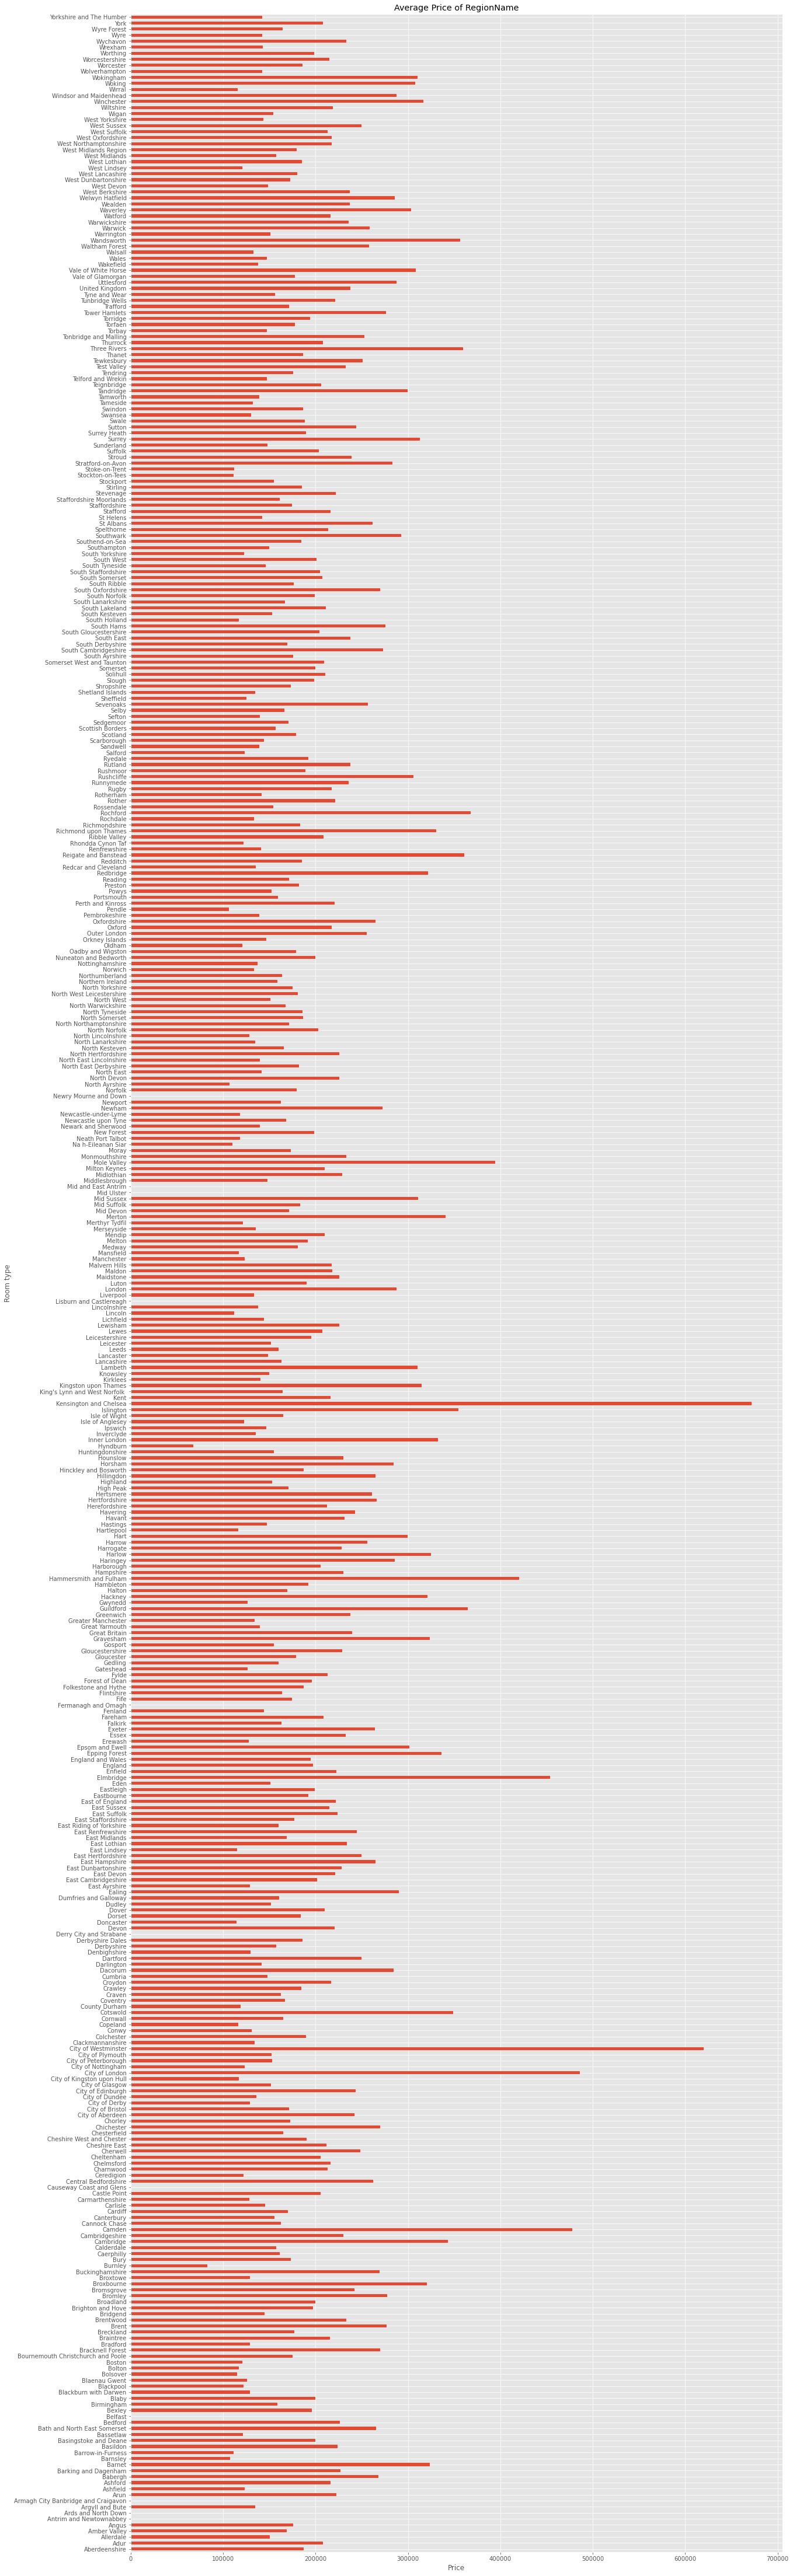

In [19]:
'''plot the average price for each RegionName'''
plt.figure(figsize = (20,80))
df.groupby('RegionName')['NewPrice'].mean().plot(kind='barh')
plt.xlabel('Price')
plt.ylabel('Room type')
plt.title("Average Price of RegionName")
plt.show

In [20]:
df["Year"] = df.index.year

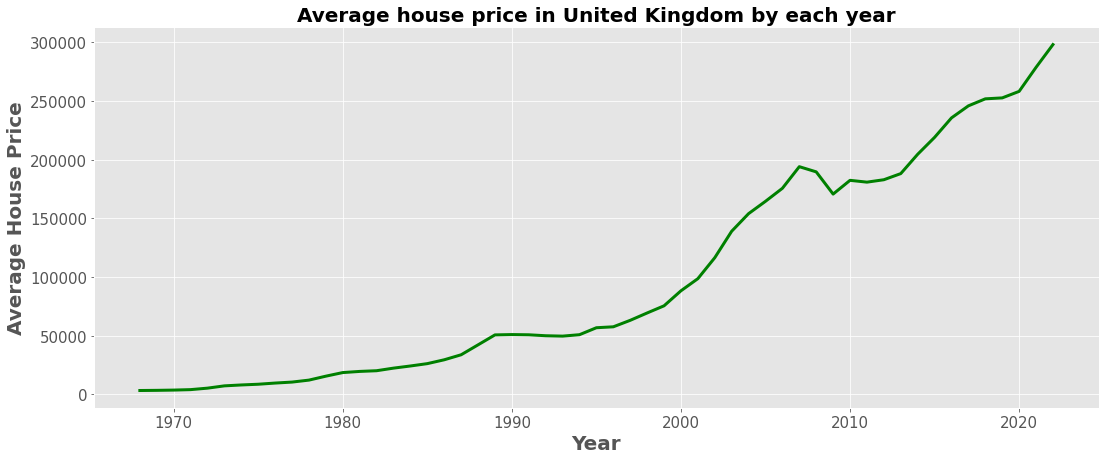

In [21]:

avg_housep = df.groupby("Year")["AveragePrice"].agg(["mean"]).reset_index()
avg_housep.columns = ["Year", "Average House Price"] 

# Line chart of Average house price in United Kingdom by each year
plt.figure(figsize = (18, 7))
sns.lineplot(x = "Year", y = "Average House Price", data = avg_housep, color = "green", linewidth = 3)
plt.title("Average house price in United Kingdom by each year", size = 20, weight = "bold")
plt.xlabel("Year", size = 20, weight = "bold")
plt.ylabel("Average House Price", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

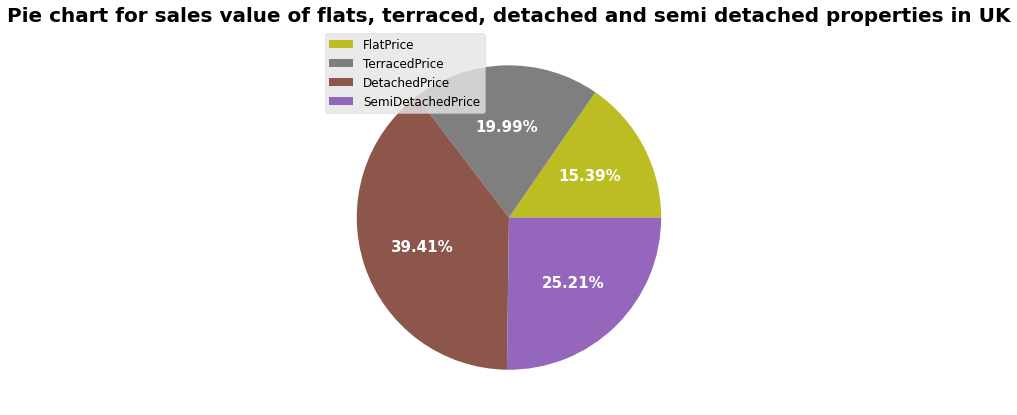

In [22]:
# Prices
avg_sales = df[["FlatPrice", "TerracedPrice", "DetachedPrice", "SemiDetachedPrice"]]

# Total values
flat_price = np.sum(avg_sales["FlatPrice"])
terraced_price = np.sum(avg_sales["TerracedPrice"])
detached_price = np.sum(avg_sales["DetachedPrice"])
semi_detached_price = np.sum(avg_sales["SemiDetachedPrice"])

# Store data for visualization
data = [flat_price,  terraced_price, detached_price, semi_detached_price]
data_labels = ["FlatPrice", "TerracedPrice", "DetachedPrice", "SemiDetachedPrice"]

# Pie chart for sales value of flats, terraced, detached and semi detached properties in Angus
colors = sns.color_palette("tab10_r")
plt.figure(figsize = (18, 7))
plt.pie(data, 
        labels = data_labels,
        colors = colors,
        autopct='%1.2f%%', 
        textprops={'color':"w", 'fontsize': 15, 'weight': 'bold'})
plt.title("Pie chart for sales value of flats, terraced, detached and semi detached properties in UK", size = 20, weight = "bold")
plt.legend(data_labels, fontsize = 12, loc = 2)
plt.show()

# Top 5 average price by region

In [23]:
import plotly.express as px
price_by_region=pd.DataFrame(df.groupby(['RegionName'])['NewPrice'].mean())
price_by_region=price_by_region.sort_values(by=['NewPrice'],ascending=False)
price_by_region=price_by_region.head(5)
fig = px.bar(price_by_region, y='NewPrice',color=price_by_region.index)
fig.show()


In [24]:
import plotly.express as px
price_by_region=pd.DataFrame(df.groupby(['RegionName'])['NewPrice'].mean())
price_by_region=price_by_region.sort_values(by=['NewPrice'],ascending=False)
price_by_region=price_by_region.tail(5)
fig = px.bar(price_by_region, y='NewPrice',color=price_by_region.index)
fig.show()


# Top 5 average price by AreaCode

In [25]:
price_by_AreaCode=pd.DataFrame(df.groupby(['AreaCode'])['NewPrice'].mean())
price_by_AreaCode=price_by_AreaCode.sort_values(by=['NewPrice'],ascending=False)
price_by_AreaCode=price_by_AreaCode.head(5)
fig = px.bar(price_by_AreaCode, y='NewPrice',color=price_by_AreaCode.index)
fig.show()

In [26]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

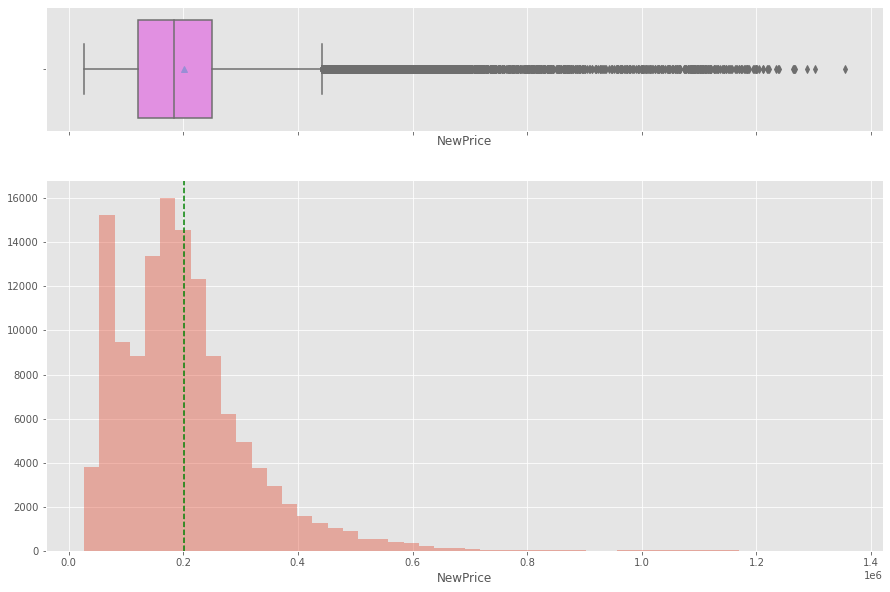

In [27]:
# Build the histogram boxplot for NewPrice
histogram_boxplot(df['NewPrice'])

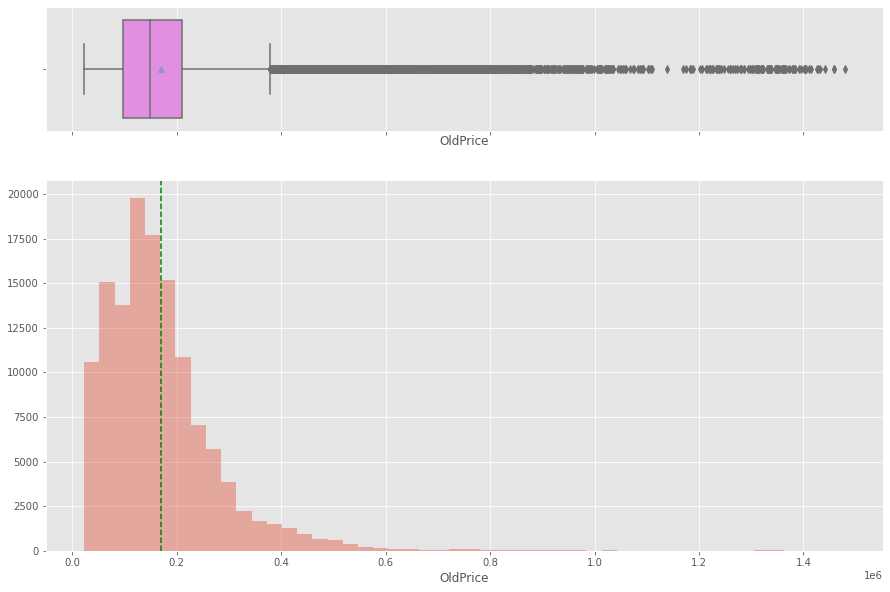

In [28]:
# Build the histogram boxplot for OldPrice
histogram_boxplot(df['OldPrice'])

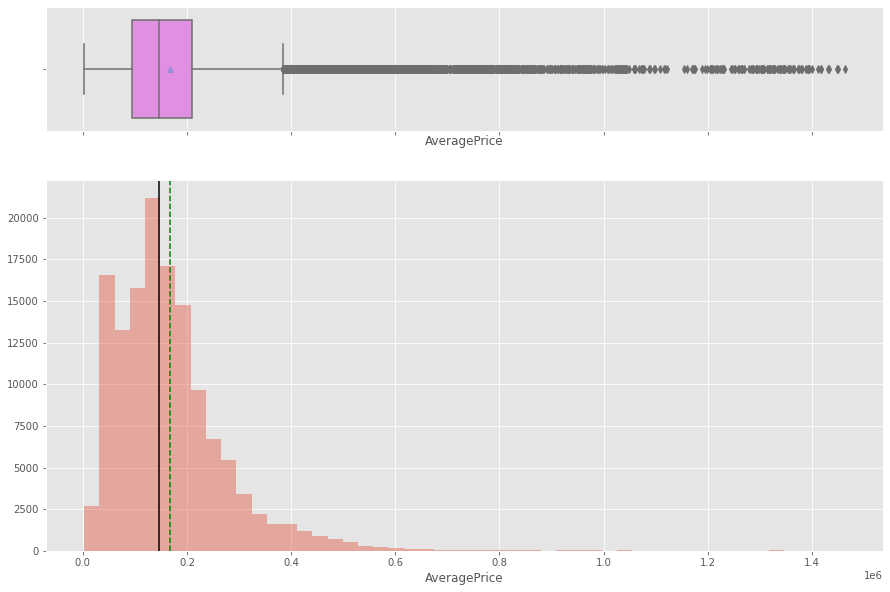

In [29]:
# Build the histogram boxplot for AveragePrice
histogram_boxplot(df['AveragePrice'])

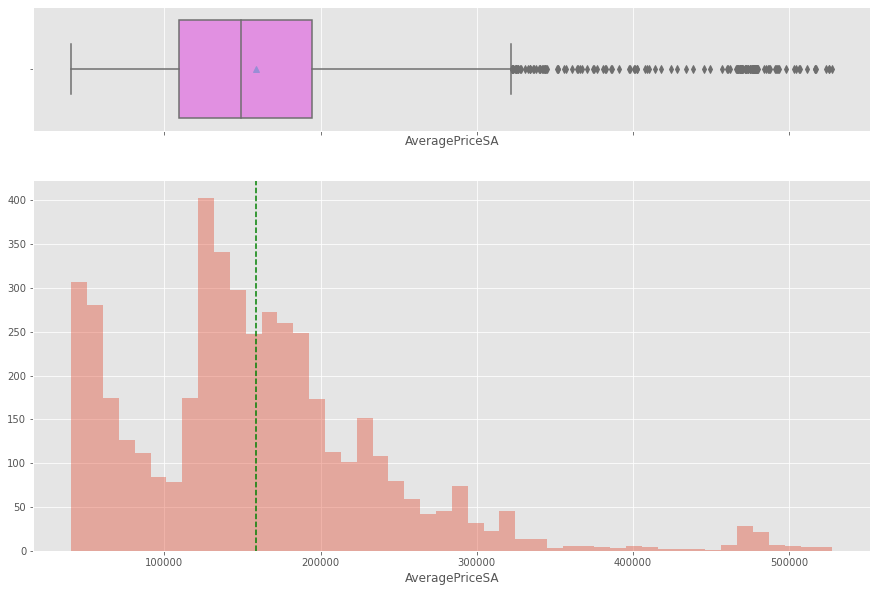

In [30]:
# Build the histogram boxplot for AveragePriceSA
histogram_boxplot(df['AveragePriceSA'])

# Heatmap Correlation plot to check if the input features are correlated with output i.e New House price

In [31]:
# Separating numerical variables
numerical_col = df.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = df[numerical_col].corr()

# plot the heatmap
print (corr['AveragePrice'].sort_values(ascending=False)[:], '\n')

AveragePrice              1.000000
AveragePriceSA            0.999800
MortgagePrice             0.999456
OldPrice                  0.998948
CashPrice                 0.997021
FOOPrice                  0.996805
FTBPrice                  0.989316
NewPrice                  0.954053
FlatPrice                 0.953615
DetachedPrice             0.942197
TerracedPrice             0.929827
SemiDetachedPrice         0.900175
IndexSA                   0.698351
year                      0.596229
Year                      0.596229
Index                     0.541865
SemiDetachedIndex         0.537777
TerracedIndex             0.535935
DetachedIndex             0.534820
NewIndex                  0.527003
OldIndex                  0.525673
FlatIndex                 0.504581
FOOIndex                  0.189587
CashIndex                 0.186111
FTBIndex                  0.185182
MortgageIndex             0.184803
FOO12m%Change             0.098098
FTB12m%Change             0.088138
Mortgage12m%Change  

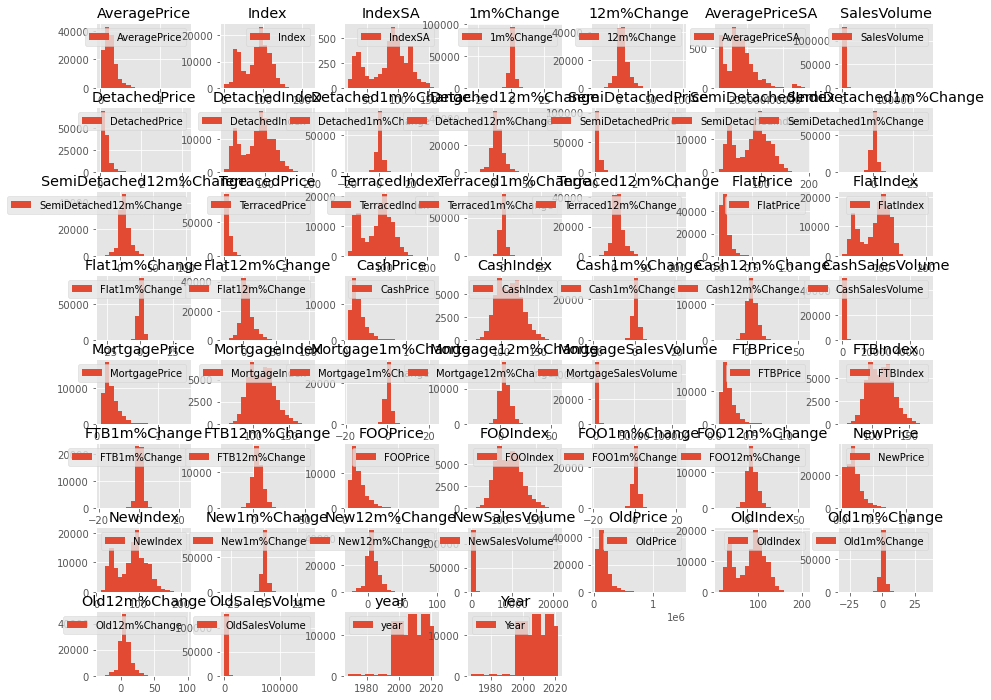

In [32]:
df.hist(figsize = (15, 12), bins = 20, backend = None, legend = True);

# Observation:


# Data preprocessing

In [33]:
#dropping features containing more than 60% missing values
df = df.drop(df.loc[:,list((100*(df.isnull().sum()/len(df))>=60))].columns, 1)

In [34]:
df=df.dropna(axis=0)
df.shape

(124578, 35)

# 1:Removing outliers using IQR method

In [35]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('RegionName'):
    m=np.mean(subdf.NewPrice)
    st=np.std(subdf.NewPrice)
    reduced_df = subdf[(subdf.NewPrice>(m-st))&(subdf.NewPrice<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out
df = remove_pps_outliers(df)
df.shape

(75138, 35)

# 2:Encoding categorical features using label encoder

In [36]:
obj=df.select_dtypes(include='object')

In [37]:
for i in obj.columns:
    le1 = LabelEncoder()
    df[i]=le1.fit_transform(df[i])

# 3:Defining inputs and output as X and y respectively

In [38]:
df.columns

Index(['RegionName', 'AreaCode', 'AveragePrice', 'Index', '1m%Change',
       '12m%Change', 'SalesVolume', 'DetachedPrice', 'DetachedIndex',
       'Detached1m%Change', 'Detached12m%Change', 'SemiDetachedPrice',
       'SemiDetachedIndex', 'SemiDetached1m%Change', 'SemiDetached12m%Change',
       'TerracedPrice', 'TerracedIndex', 'Terraced1m%Change',
       'Terraced12m%Change', 'FlatPrice', 'FlatIndex', 'Flat1m%Change',
       'Flat12m%Change', 'NewPrice', 'NewIndex', 'New1m%Change',
       'New12m%Change', 'NewSalesVolume', 'OldPrice', 'OldIndex',
       'Old1m%Change', 'Old12m%Change', 'OldSalesVolume', 'year', 'Year'],
      dtype='object')

In [39]:
X=df.drop(['NewPrice','year'],axis=1)
y=df['NewPrice']

# 4:Scaling input  and output features using standard scaler

In [40]:

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

print(X)
print(y)

       RegionName  AreaCode  AveragePrice     Index  1m%Change  12m%Change  \
0       -1.733614  1.449601     -0.267894 -0.603070   2.702219    1.866621   
1       -1.733614  1.449601     -0.212568 -0.479689   1.250012    1.969314   
2       -1.733614  1.449601     -0.155375 -0.352144   1.260840    2.279757   
3       -1.733614  1.449601     -0.059457 -0.138239   2.224706    2.588177   
4       -1.733614  1.449601      0.003231  0.001558   1.296191    2.374429   
...           ...       ...           ...       ...        ...         ...   
75133    1.720636  1.169035     -0.280990  1.542346   0.023489   -0.163037   
75134    1.720636  1.169035     -0.268145  1.584401   0.092584   -0.350948   
75135    1.720636  1.169035     -0.240042  1.676412   0.506989   -0.298999   
75136    1.720636  1.169035     -0.227489  1.717513   0.077929   -0.322388   
75137    1.720636  1.169035     -0.214353  1.760521  -0.359013   -0.344648   

       SalesVolume  DetachedPrice  DetachedIndex  Detached1m%Ch

# 5:Splitting the dataset into testing and training respectively

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating function of all evaluation metrics

In [42]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score



def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    r2_score = metrics.r2_score(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))

    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('r2_score:', r2_score)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    r2_score = metrics.r2_score(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    return mae, mse, rmse,r2_score

# Modeling

# Model 1:LinearRegression

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(copy_X= True, fit_intercept= True, positive=False)
lin_reg.fit(X_train,y_train)
# print the intercept
print(lin_reg.intercept_)

207617.62683198924


In [44]:
#Coefficient terms of linear regression
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
RegionName             -8.567479e+02
AreaCode               -8.759889e+00
AveragePrice            1.610783e+05
Index                  -2.000871e+05
1m%Change              -1.071136e+02
12m%Change              8.926695e+03
SalesVolume            -1.121259e+06
DetachedPrice           8.508925e+03
DetachedIndex          -2.827226e+04
Detached1m%Change       3.058198e+02
Detached12m%Change      2.957703e+03
SemiDetachedPrice       6.063374e+02
SemiDetachedIndex       6.278741e+03
SemiDetached1m%Change  -2.628091e+00
SemiDetached12m%Change -1.173870e+04
TerracedPrice          -1.071551e+03
TerracedIndex          -5.201444e+03
Terraced1m%Change      -9.305392e+02
Terraced12m%Change     -2.841154e+03
FlatPrice              -2.406616e+04
FlatIndex               3.872072e+03
Flat1m%Change           1.518866e+02
Flat12m%Change          3.052960e+03
NewIndex                4.786188e+04
New1m%Change            3.456189e+02
New12m%Change          -6.886755e+02
NewSalesVolume          1.189048e+05
OldPrice               -7.998302e+04
OldIndex                1.802761e+05
Old1m%Change            1.684562e+02
Old12m%Change           8.045649e+02
OldSalesVolume          1.009271e+06
Year                    1.755198e+03

# Actual vs predicted values for linear regression

In [45]:
#test data prediction
pred_linear = lin_reg.predict(X_test)
#scatter plot of actual vs predicted values
res=pd.DataFrame({'True Values': y_test, 'Predicted Values': pred_linear})
px.scatter(res,x='True Values',y='Predicted Values')

In [46]:
#calling the evaluation function that we created earlier for the test and train predictions
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 18514.6378024121
MSE: 724257969.1106468
RMSE: 26912.04134046035
r2_score: 0.861864512540015
__________________________________
Train set evaluation:
_____________________________________
MAE: 18536.952871479065
MSE: 737331214.5482557
RMSE: 27153.84345812312
r2_score: 0.8610021242662382
__________________________________


# test set evaluations 

In [47]:
#data frame of evaluations
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2square'])
results_df

Model           MAE           MSE         RMSE  R2square
0  Linear Regression  18514.637802  7.242580e+08  26912.04134  0.861865

# Model 2:RandomForestRegressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 4396.758337652205
MSE: 86883969.45081092
RMSE: 9321.157087551466
r2_score: 0.9834288886219867
__________________________________
Train set evaluation:
_____________________________________
MAE: 2631.652845080325
MSE: 49852198.505992346
RMSE: 7060.608933087312
r2_score: 0.9906021207887744
__________________________________


# Actual vs predicted values for RandomForestRegressor

In [49]:
#test data prediction
pred_rf = rf_reg.predict(X_test)
#scatter plot of actual vs predicted values
res=pd.DataFrame({'True Values': y_test, 'Predicted Values': pred_rf})
px.scatter(res,x='True Values',y='Predicted Values')

In [50]:
results_df_2 = pd.DataFrame(data=[["Random forest Regression", *evaluate(y_test, pred_rf) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0         Linear Regression  18514.637802  7.242580e+08  26912.041340   
1  Random forest Regression   4396.758338  8.688397e+07   9321.157088   

   R2square  
0  0.861865  
1  0.983429

# Feature importance for RandomForestRegressor

In [51]:
l=[]
l2=[]
for name, importance in zip(X.columns, rf_reg.feature_importances_):
    print(name, importance)
    l.append(importance)
    l2.append(name)

RegionName 0.03531176645656532
AreaCode 0.04047799144489063
AveragePrice 0.7902132077542735
Index 0.008011219067855771
1m%Change 0.0006750821303296845
12m%Change 0.0015673721054561313
SalesVolume 0.0031503080084607023
DetachedPrice 0.026834400527807018
DetachedIndex 0.003837035063984347
Detached1m%Change 0.00024863115647215834
Detached12m%Change 0.0009612065362903433
SemiDetachedPrice 0.021026176075704207
SemiDetachedIndex 0.00515260833952708
SemiDetached1m%Change 0.0001648922673751492
SemiDetached12m%Change 0.00048325943159957665
TerracedPrice 0.010769956872073824
TerracedIndex 0.0025771135958643156
Terraced1m%Change 0.00013272402043758362
Terraced12m%Change 0.00034265855424567526
FlatPrice 0.009484064649017132
FlatIndex 0.0057364224970074
Flat1m%Change 0.00016718617986073698
Flat12m%Change 0.000618704143006132
NewIndex 0.010821239528863423
New1m%Change 0.0002620695082220857
New12m%Change 0.0007816972407174861
NewSalesVolume 0.004500317755400034
OldPrice 0.007319745269932187
OldIndex 

<BarContainer object of 33 artists>

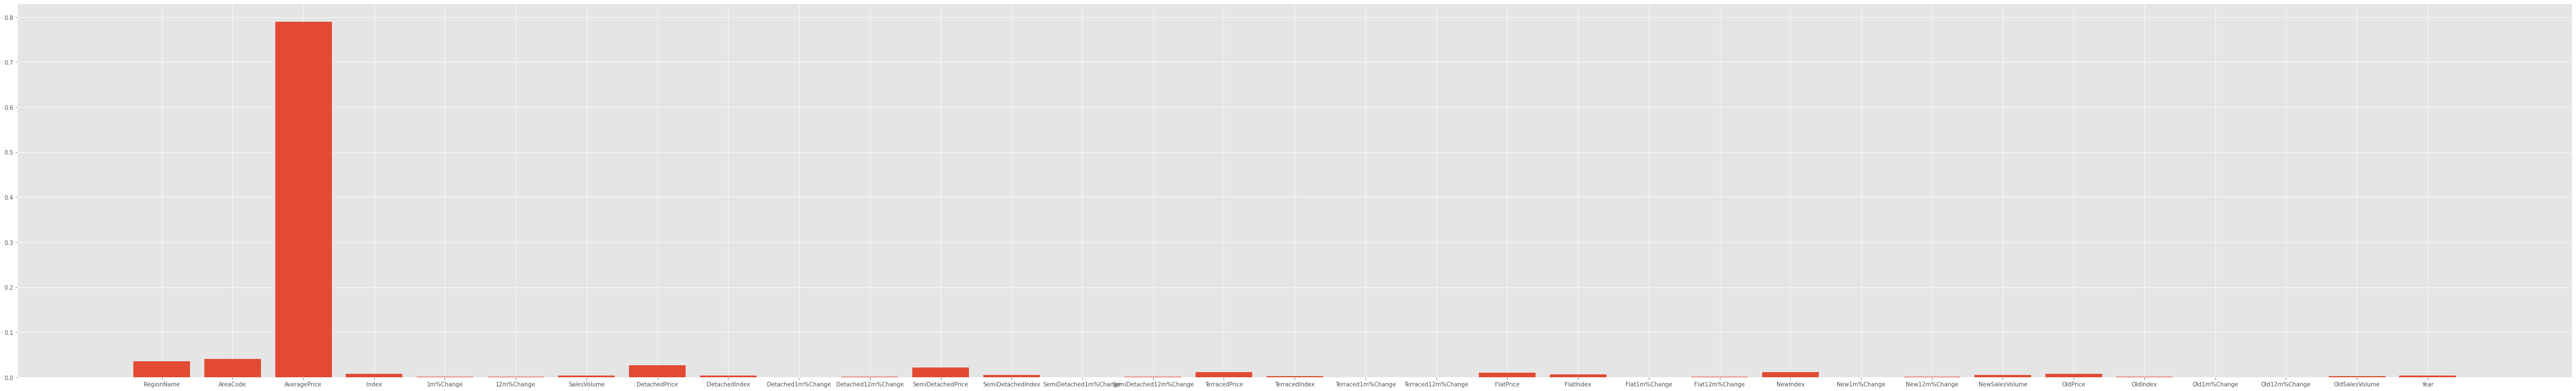

In [52]:
plt.figure(figsize=(80,12))
plt.bar(l2,l)

# Observation:
    Average price is  the most important feature in house price
    FlatPrice is  the  second most important feature in predicting price
    

# Model 3:SVR

In [53]:
from sklearn.svm import SVR

svm_reg = SVR()
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 56748.970304399416
MSE: 5516714154.428705
RMSE: 74274.58619493416
r2_score: -0.05218586663971836
__________________________________
Train set evaluation:
_____________________________________
MAE: 56941.26902033804
MSE: 5574644288.12978
RMSE: 74663.54055447532
r2_score: -0.05090317449279258
__________________________________


# Actual vs predicted values for SVR Regressor

In [54]:
pred_svm = svm_reg.predict(X_test)
res=pd.DataFrame({'True Values': y_test, 'Predicted Values': pred_svm})
px.scatter(res,x='True Values',y='Predicted Values')

In [55]:
results_df_2 = pd.DataFrame(data=[["SVM Regression", *evaluate(y_test, pred_svm) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0         Linear Regression  18514.637802  7.242580e+08  26912.041340   
1  Random forest Regression   4396.758338  8.688397e+07   9321.157088   
2            SVM Regression  56748.970304  5.516714e+09  74274.586195   

   R2square  
0  0.861865  
1  0.983429  
2 -0.052186

# Model 4:XGBRegressor

In [56]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

test_pred = xgb_reg.predict(X_test)
train_pred = xgb_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 4613.6652162563205
MSE: 40913884.13445684
RMSE: 6396.396183356441
r2_score: 0.9921966211352365
__________________________________
Train set evaluation:
_____________________________________
MAE: 3877.271583405902
MSE: 27156453.759488784
RMSE: 5211.185446660748
r2_score: 0.994880605472069
__________________________________


# Actual vs predicted values for XGBRegressor

In [57]:
pred_xgb = xgb_reg.predict(X_test)
res=pd.DataFrame({'True Values': y_test, 'Predicted Values': pred_xgb})
px.scatter(res,x='True Values',y='Predicted Values')

In [58]:
results_df_2 = pd.DataFrame(data=[["XGB Regression", *evaluate(y_test, pred_xgb) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0         Linear Regression  18514.637802  7.242580e+08  26912.041340   
1  Random forest Regression   4396.758338  8.688397e+07   9321.157088   
2            SVM Regression  56748.970304  5.516714e+09  74274.586195   
3            XGB Regression   4613.665216  4.091388e+07   6396.396183   

   R2square  
0  0.861865  
1  0.983429  
2 -0.052186  
3  0.992197

# Feature importance for XGBRegressor

In [59]:
l=[]
l2=[]
for name, importance in zip(X.columns, xgb_reg.feature_importances_):
    print(name, importance)
    l.append(importance)
    l2.append(name)

RegionName 0.026686518
AreaCode 0.031531174
AveragePrice 0.59528685
Index 0.003341885
1m%Change 0.00014852542
12m%Change 0.0011770963
SalesVolume 0.0034341495
DetachedPrice 0.050786648
DetachedIndex 0.008899787
Detached1m%Change 0.0006810242
Detached12m%Change 0.0031622336
SemiDetachedPrice 0.039163053
SemiDetachedIndex 0.024597716
SemiDetached1m%Change 0.0002862772
SemiDetached12m%Change 0.0040257513
TerracedPrice 0.019275157
TerracedIndex 0.011651221
Terraced1m%Change 0.00043045578
Terraced12m%Change 0.00071669393
FlatPrice 0.086365536
FlatIndex 0.021035466
Flat1m%Change 0.00036176824
Flat12m%Change 0.0029210767
NewIndex 0.012411849
New1m%Change 0.0005072239
New12m%Change 0.0015719763
NewSalesVolume 0.0054690875
OldPrice 0.015760088
OldIndex 0.004269249
Old1m%Change 0.00016587316
Old12m%Change 0.0016749277
OldSalesVolume 0.0072506666
Year 0.014952974


<BarContainer object of 33 artists>

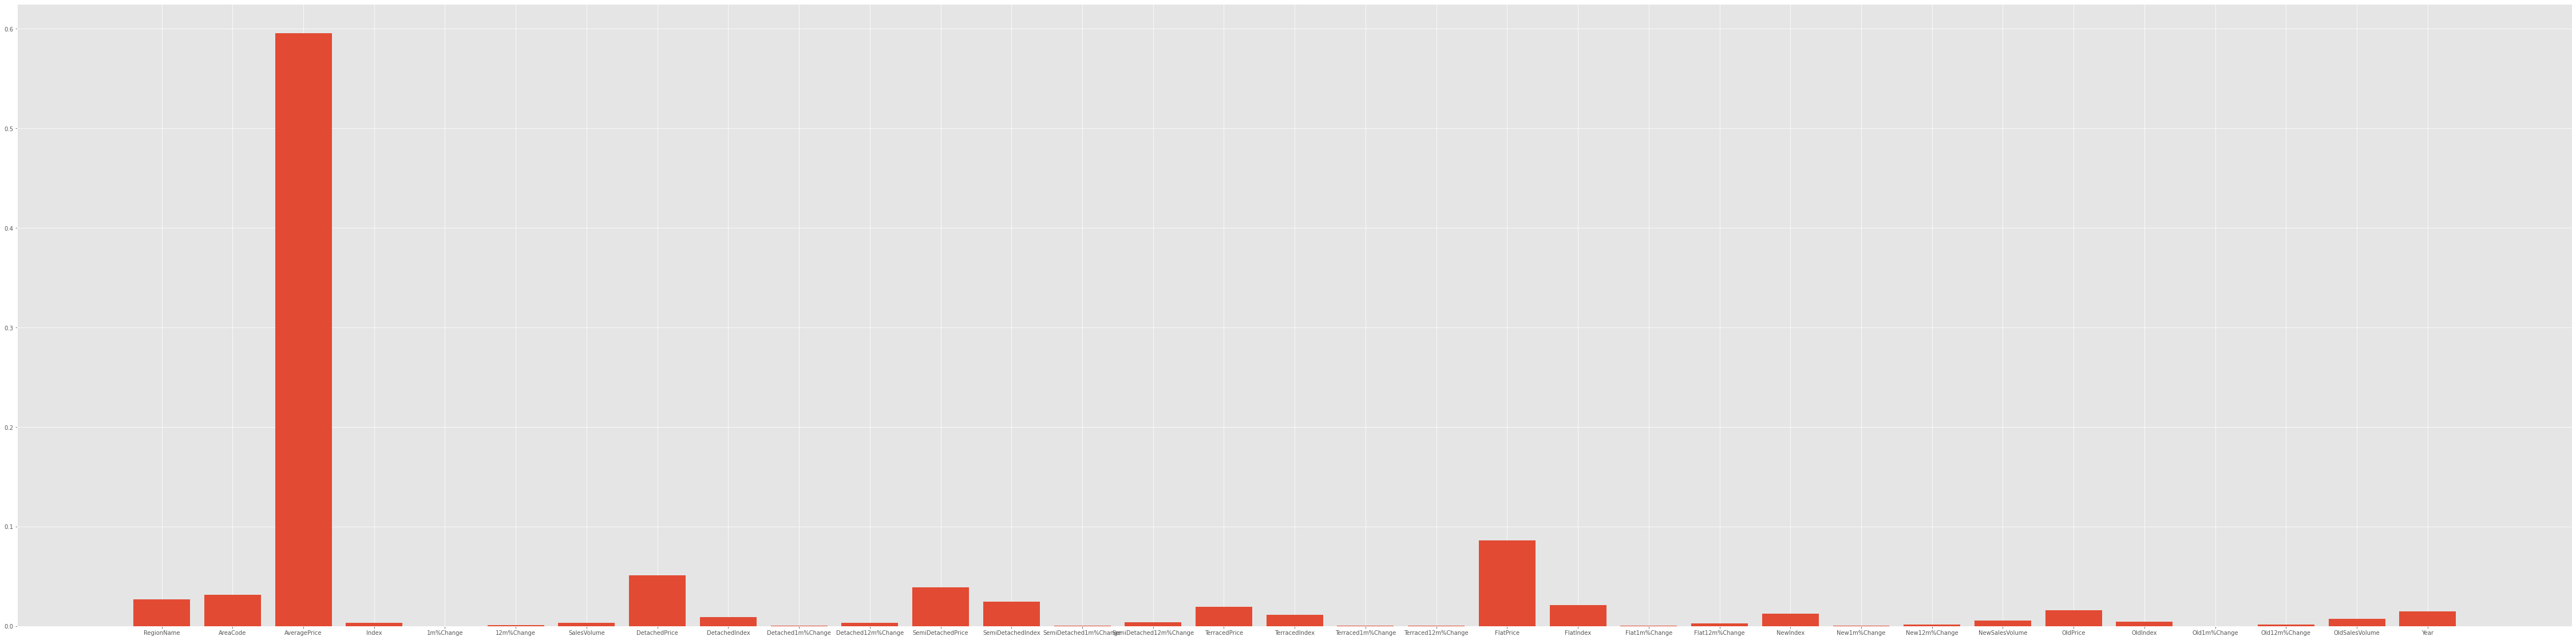

In [60]:
plt.figure(figsize=(80,20))
plt.bar(l2,l)

# Observation:
AveragePrice is  the most important feature in predicting price

Flatprice  is  the  second most important feature in predicting price

old price,year  and DetachedPrice are also the important features in prediction of price for XGBRegressor

# Model 5:DecisionTreeRegressor

In [61]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

test_pred = dt_reg.predict(X_test)
train_pred = dt_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')


Test set evaluation:
_____________________________________
MAE: 4077.5225459389144
MSE: 92594597.9190188
RMSE: 9622.608685747271
r2_score: 0.9823397180766803
__________________________________


In [62]:
pred_dt= dt_reg.predict(X_test)
res=pd.DataFrame({'True Values': y_test, 'Predicted Values': pred_dt})
px.scatter(res,x='True Values',y='Predicted Values')

In [63]:
results_df_2 = pd.DataFrame(data=[["decision tree Regression", *evaluate(y_test, pred_dt) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0         Linear Regression  18514.637802  7.242580e+08  26912.041340   
1  Random forest Regression   4396.758338  8.688397e+07   9321.157088   
2            SVM Regression  56748.970304  5.516714e+09  74274.586195   
3            XGB Regression   4613.665216  4.091388e+07   6396.396183   
4  decision tree Regression   4077.522546  9.259460e+07   9622.608686   

   R2square  
0  0.861865  
1  0.983429  
2 -0.052186  
3  0.992197  
4  0.982340

In [64]:
l3=[]
l4=[]
for name, importance in zip(X.columns, dt_reg.feature_importances_):
    print(name, importance)
    l3.append(importance)
    l4.append(name)

RegionName 0.0321864670338098
AreaCode 0.04985629732365233
AveragePrice 0.7570493207735944
Index 0.0016680902154858407
1m%Change 6.23933769497491e-05
12m%Change 0.0001565281281268264
SalesVolume 0.002276048148077586
DetachedPrice 0.016596715309670888
DetachedIndex 0.0036047086535833683
Detached1m%Change 0.00017566563926909586
Detached12m%Change 0.0002481864623458349
SemiDetachedPrice 0.024959271956758476
SemiDetachedIndex 0.0039191558441461286
SemiDetached1m%Change 6.144696413740935e-05
SemiDetached12m%Change 0.00026980328188080515
TerracedPrice 0.009706258231654658
TerracedIndex 0.0022705407246782733
Terraced1m%Change 7.862426187232508e-05
Terraced12m%Change 0.00038068410087950235
FlatPrice 0.06532201270296338
FlatIndex 0.006244187104016207
Flat1m%Change 9.798975794466684e-05
Flat12m%Change 0.0004115747940791707
NewIndex 0.01030055634298989
New1m%Change 0.0001340193475377505
New12m%Change 0.0003318059975080149
NewSalesVolume 0.0008110098559693796
OldPrice 0.004702713039743228
OldIndex

<BarContainer object of 33 artists>

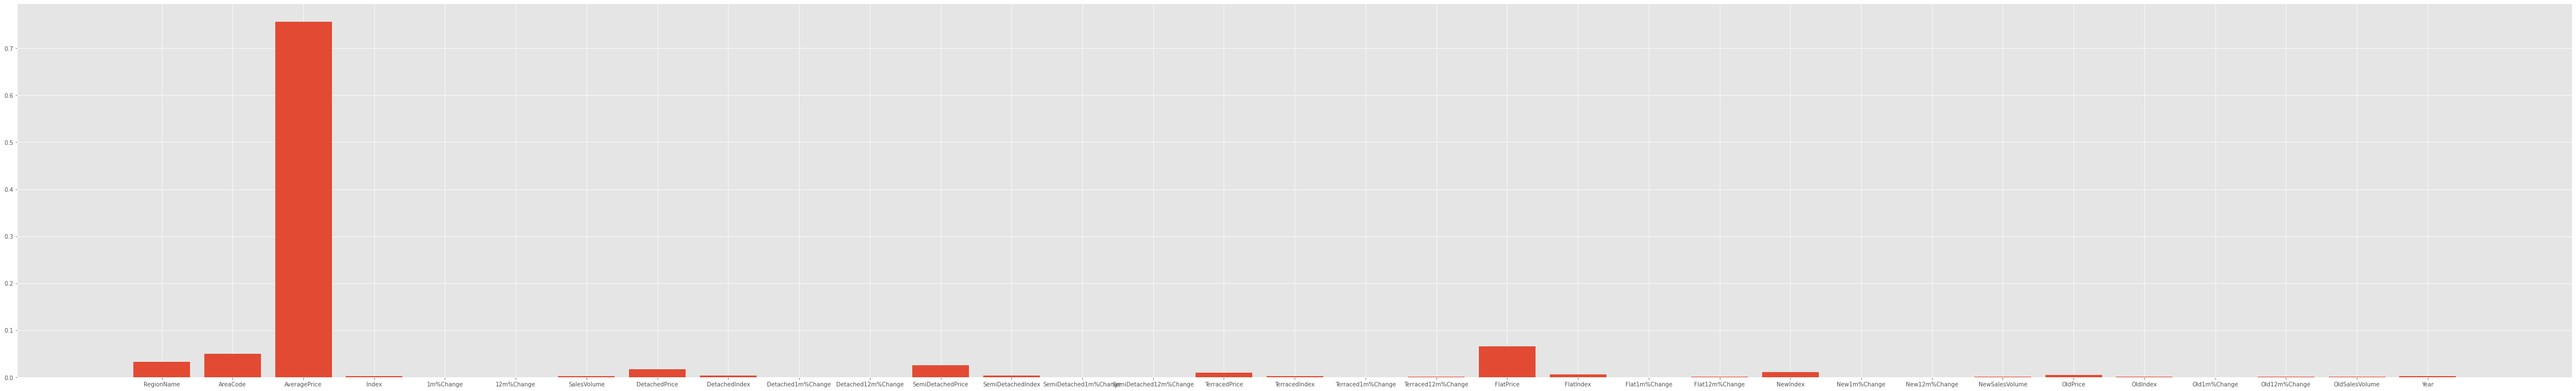

In [65]:
plt.figure(figsize=(80,12))
plt.bar(l4,l3)

# Model 6:GradientBoostingRegressor

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)

test_pred = gb_reg.predict(X_test)
train_pred = gb_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 16410.08867380721
MSE: 511710297.670056
RMSE: 22621.014514606897
r2_score: 0.9024030740127784
__________________________________
Train set evaluation:
_____________________________________
MAE: 16201.318276300215
MSE: 501757128.3256335
RMSE: 22399.935900034034
r2_score: 0.9054113353735261
__________________________________


In [67]:
pred_gb= gb_reg.predict(X_test)
res=pd.DataFrame({'True Values': y_test, 'Predicted Values': pred_gb})
px.scatter(res,x='True Values',y='Predicted Values')

In [68]:
results_df_2 = pd.DataFrame(data=[["Gradient boosting Regression", *evaluate(y_test, pred_gb) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0             Linear Regression  18514.637802  7.242580e+08  26912.041340   
1      Random forest Regression   4396.758338  8.688397e+07   9321.157088   
2                SVM Regression  56748.970304  5.516714e+09  74274.586195   
3                XGB Regression   4613.665216  4.091388e+07   6396.396183   
4      decision tree Regression   4077.522546  9.259460e+07   9622.608686   
5  Gradient boosting Regression  16410.088674  5.117103e+08  22621.014515   

   R2square  
0  0.861865  
1  0.983429  
2 -0.052186  
3  0.992197  
4  0.982340  
5  0.902403

In [69]:
l5=[]
l6=[]
for name, importance in zip(X.columns, gb_reg.feature_importances_):
    print(name, importance)
    l5.append(importance)
    l6.append(name)

RegionName 0.01751407857275253
AreaCode 0.031053669459878704
AveragePrice 0.8313165802847257
Index 0.0
1m%Change 0.0
12m%Change 0.0
SalesVolume 0.0
DetachedPrice 0.048602772824631296
DetachedIndex 0.0019619518498755722
Detached1m%Change 0.0
Detached12m%Change 0.0
SemiDetachedPrice 0.005334054616039693
SemiDetachedIndex 0.001907092515176403
SemiDetached1m%Change 0.0
SemiDetached12m%Change 4.888920042443468e-05
TerracedPrice 0.005234241778751932
TerracedIndex 0.0008999747917593452
Terraced1m%Change 0.0
Terraced12m%Change 7.162755571252255e-08
FlatPrice 0.04121774396254456
FlatIndex 0.0011378344297971253
Flat1m%Change 0.0
Flat12m%Change 0.0
NewIndex 0.004545226932358643
New1m%Change 0.0
New12m%Change 0.00017272201840180985
NewSalesVolume 0.0007508953299732547
OldPrice 0.0010301724622887752
OldIndex 0.0007788741730898122
Old1m%Change 0.0
Old12m%Change 0.0
OldSalesVolume 0.0004946294562785765
Year 0.005998523713696125


<BarContainer object of 33 artists>

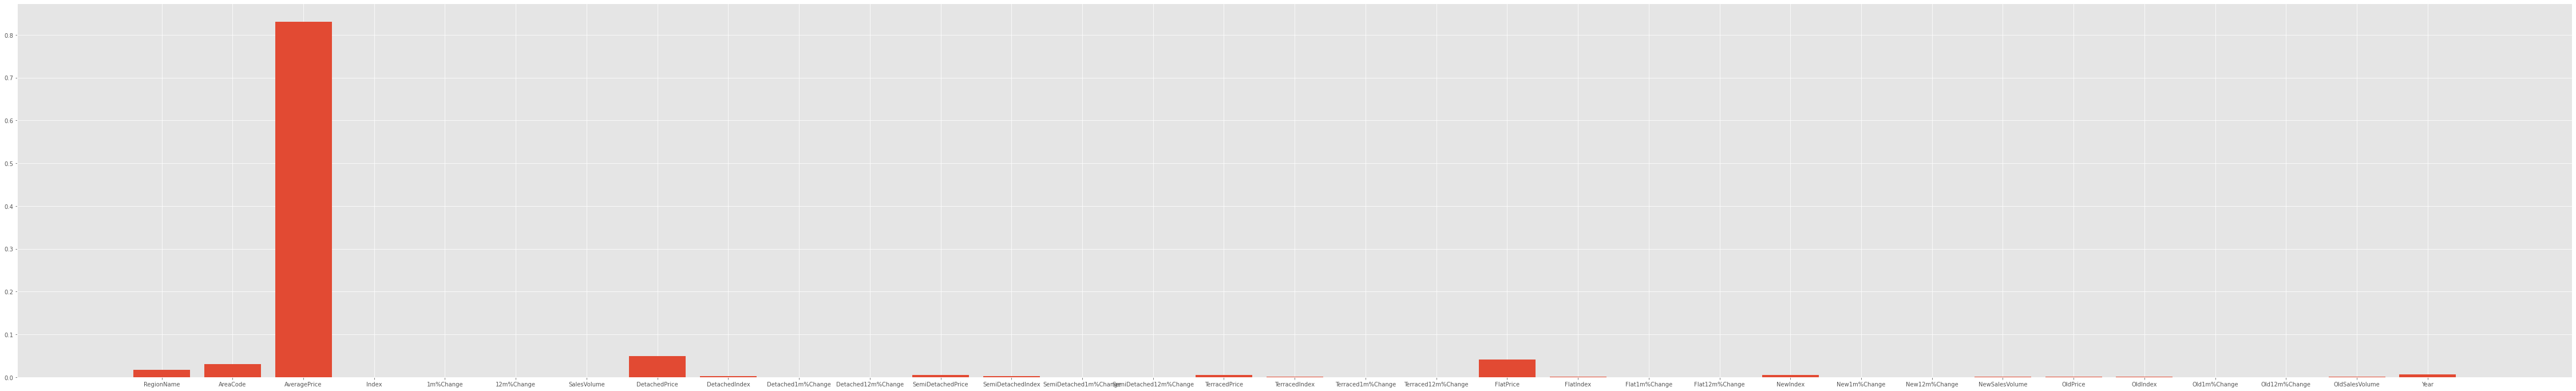

In [70]:
plt.figure(figsize=(80,12))
plt.bar(l6,l5)

# Model 7:BaggingRegressor

In [71]:
from sklearn.ensemble import BaggingRegressor
bagging_reg = BaggingRegressor()
bagging_reg.fit(X_train, y_train)

test_pred = bagging_reg.predict(X_test)
train_pred = bagging_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 4331.113619080849
MSE: 58147713.31194619
RMSE: 7625.464793174656
r2_score: 0.988909666078107
__________________________________
Train set evaluation:
_____________________________________
MAE: 1880.2816663532026
MSE: 13566392.983785894
RMSE: 3683.2584736596878
r2_score: 0.9974425336010344
__________________________________


In [72]:
pred_bagging= bagging_reg.predict(X_test)
res=pd.DataFrame({'True Values': y_test, 'Predicted Values': pred_bagging})
px.scatter(res,x='True Values',y='Predicted Values')

In [73]:
results_df_2 = pd.DataFrame(data=[["Bagging Regression", *evaluate(y_test, pred_bagging) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0             Linear Regression  18514.637802  7.242580e+08  26912.041340   
1      Random forest Regression   4396.758338  8.688397e+07   9321.157088   
2                SVM Regression  56748.970304  5.516714e+09  74274.586195   
3                XGB Regression   4613.665216  4.091388e+07   6396.396183   
4      decision tree Regression   4077.522546  9.259460e+07   9622.608686   
5  Gradient boosting Regression  16410.088674  5.117103e+08  22621.014515   
6            Bagging Regression   4331.113619  5.814771e+07   7625.464793   

   R2square  
0  0.861865  
1  0.983429  
2 -0.052186  
3  0.992197  
4  0.982340  
5  0.902403  
6  0.988910

# Model 8:ExtraTreesRegressor

In [74]:
from sklearn.ensemble import ExtraTreesRegressor
ExtraTrees_reg = ExtraTreesRegressor()
ExtraTrees_reg.fit(X_train, y_train)

test_pred = ExtraTrees_reg.predict(X_test)
train_pred = ExtraTrees_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3592.6948337762437
MSE: 44407378.06645577
RMSE: 6663.886108454718
r2_score: 0.9915303178181633
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.785328025954885e-10
MSE: 3.3273649258743533e-15
RMSE: 5.76833158363348e-08
r2_score: 1.0
__________________________________


In [75]:
pred_extratrees= ExtraTrees_reg.predict(X_test)
res=pd.DataFrame({'True Values': y_test, 'Predicted Values': pred_extratrees})
px.scatter(res,x='True Values',y='Predicted Values')

In [76]:
results_df_2 = pd.DataFrame(data=[["ExtraTrees Regression", *evaluate(y_test, pred_extratrees) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0             Linear Regression  18514.637802  7.242580e+08  26912.041340   
1      Random forest Regression   4396.758338  8.688397e+07   9321.157088   
2                SVM Regression  56748.970304  5.516714e+09  74274.586195   
3                XGB Regression   4613.665216  4.091388e+07   6396.396183   
4      decision tree Regression   4077.522546  9.259460e+07   9622.608686   
5  Gradient boosting Regression  16410.088674  5.117103e+08  22621.014515   
6            Bagging Regression   4331.113619  5.814771e+07   7625.464793   
7         ExtraTrees Regression   3592.694834  4.440738e+07   6663.886108   

   R2square  
0  0.861865  
1  0.983429  
2 -0.052186  
3  0.992197  
4  0.982340  
5  0.902403  
6  0.988910  
7  0.991530

In [77]:
l7=[]
l8=[]
for name, importance in zip(X.columns, ExtraTrees_reg.feature_importances_):
    print(name, importance)
    l7.append(importance)
    l8.append(name)

RegionName 0.02168404998563821
AreaCode 0.019619677930602902
AveragePrice 0.27053663811211287
Index 0.006200730962317529
1m%Change 0.0003503338401870839
12m%Change 0.0008880839793204382
SalesVolume 0.0019858802905485676
DetachedPrice 0.08763304268290661
DetachedIndex 0.005537978770677379
Detached1m%Change 0.00036108877630124597
Detached12m%Change 0.0014842326329910331
SemiDetachedPrice 0.06743578878760852
SemiDetachedIndex 0.005863549263902807
SemiDetached1m%Change 0.00034408261088953715
SemiDetached12m%Change 0.0009636786031979453
TerracedPrice 0.10377473851813228
TerracedIndex 0.005948707542923486
Terraced1m%Change 0.00036425627587962663
Terraced12m%Change 0.0009032254546567901
FlatPrice 0.08888039760656488
FlatIndex 0.005097710784088439
Flat1m%Change 0.00037570643281469984
Flat12m%Change 0.0010365876695241079
NewIndex 0.0069769505722033515
New1m%Change 0.0003928107776682906
New12m%Change 0.0009311409530303972
NewSalesVolume 0.0014071911849969686
OldPrice 0.2805484715818946
OldIndex 

<BarContainer object of 33 artists>

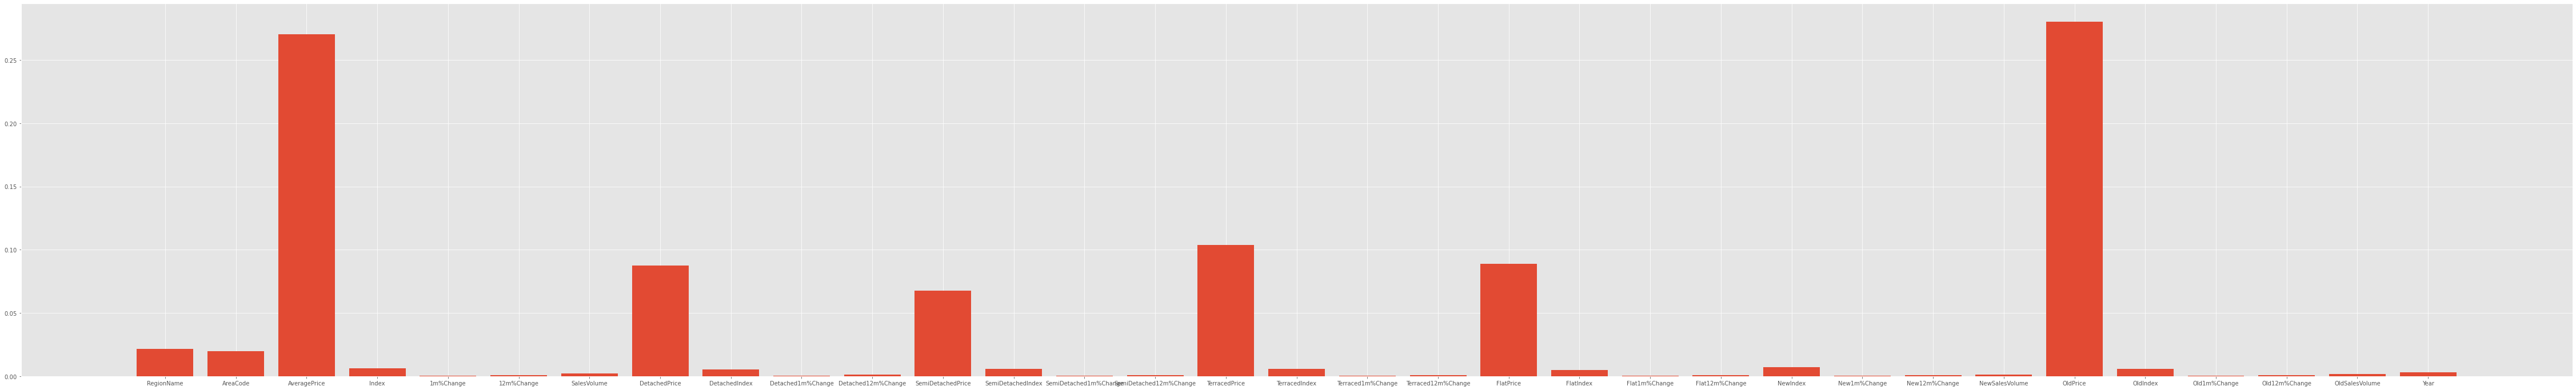

In [78]:
plt.figure(figsize=(80,12))
plt.bar(l8,l7)

# Model 9: Neural network

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='elu'))
model.add(Dense(232, activation='elu'))


model.add(Dense(164, activation='elu'))


model.add(Dense(128, activation='elu'))


model.add(Dense(50, activation='elu'))

model.add(Dense(1))

model.compile(optimizer=Adam(), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=150,
              epochs=200)

Epoch 1/200


2022-08-20 21:57:08.413852: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


401/401 [==============================] - 3s 5ms/step - loss: 14704683008.0000 - val_loss: 1846790400.0000
Epoch 2/200
401/401 [==============================] - 2s 4ms/step - loss: 1181941376.0000 - val_loss: 939237056.0000
Epoch 3/200
401/401 [==============================] - 2s 5ms/step - loss: 897036672.0000 - val_loss: 872676096.0000
Epoch 4/200
401/401 [==============================] - 2s 4ms/step - loss: 848203392.0000 - val_loss: 840473856.0000
Epoch 5/200
401/401 [==============================] - 2s 4ms/step - loss: 820755584.0000 - val_loss: 808426880.0000
Epoch 6/200
401/401 [==============================] - 2s 4ms/step - loss: 792073600.0000 - val_loss: 782281664.0000
Epoch 7/200
401/401 [==============================] - 2s 4ms/step - loss: 763325632.0000 - val_loss: 741744640.0000
Epoch 8/200
401/401 [==============================] - 2s 4ms/step - loss: 732846592.0000 - val_loss: 711315328.0000
Epoch 9/200
401/401 [==============================] - 2s 4ms/step - los

In [80]:
pd.DataFrame(r.history)

loss      val_loss
0    1.470468e+10  1.846790e+09
1    1.181941e+09  9.392371e+08
2    8.970367e+08  8.726761e+08
3    8.482034e+08  8.404739e+08
4    8.207556e+08  8.084269e+08
..            ...           ...
195  1.767482e+07  1.735295e+07
196  1.845786e+07  2.531204e+07
197  1.767457e+07  1.491911e+07
198  1.582973e+07  1.756883e+07
199  1.661711e+07  1.835236e+07

[200 rows x 2 columns]

# Epoch vs loss comparison for neural network

In [81]:
pd.DataFrame(r.history).hvplot.line(y=['loss', 'val_loss'])

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [82]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

1879/1879 [==============================] - 3s 2ms/step
Test set evaluation:
_____________________________________
MAE: 3124.4298648405475
MSE: 18352352.32816089
RMSE: 4283.964557295133
r2_score: 0.9964997124739947
__________________________________
Train set evaluation:
_____________________________________
MAE: 3040.2716935783774
MSE: 17741510.185324036
RMSE: 4212.06721044715
r2_score: 0.9966554620509592
__________________________________


In [83]:
import hvplot.pandas
res=pd.DataFrame({'True Values': y_test, 'Predicted Values': test_pred.ravel()})
px.scatter(res,x='True Values',y='Predicted Values')

# Evaluation for all the models

In [84]:
results_df_2 = pd.DataFrame(data=[["Neural network", *evaluate(y_test, test_pred.ravel()) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0             Linear Regression  18514.637802  7.242580e+08  26912.041340   
1      Random forest Regression   4396.758338  8.688397e+07   9321.157088   
2                SVM Regression  56748.970304  5.516714e+09  74274.586195   
3                XGB Regression   4613.665216  4.091388e+07   6396.396183   
4      decision tree Regression   4077.522546  9.259460e+07   9622.608686   
5  Gradient boosting Regression  16410.088674  5.117103e+08  22621.014515   
6            Bagging Regression   4331.113619  5.814771e+07   7625.464793   
7         ExtraTrees Regression   3592.694834  4.440738e+07   6663.886108   
8                Neural network   3124.429865  1.835235e+07   4283.964557   

   R2square  
0  0.861865  
1  0.983429  
2 -0.052186  
3  0.992197  
4  0.982340  
5  0.902403  
6  0.988910  
7  0.991530  
8  0.996500

# MAE for all the models

<AxesSubplot:ylabel='Model'>

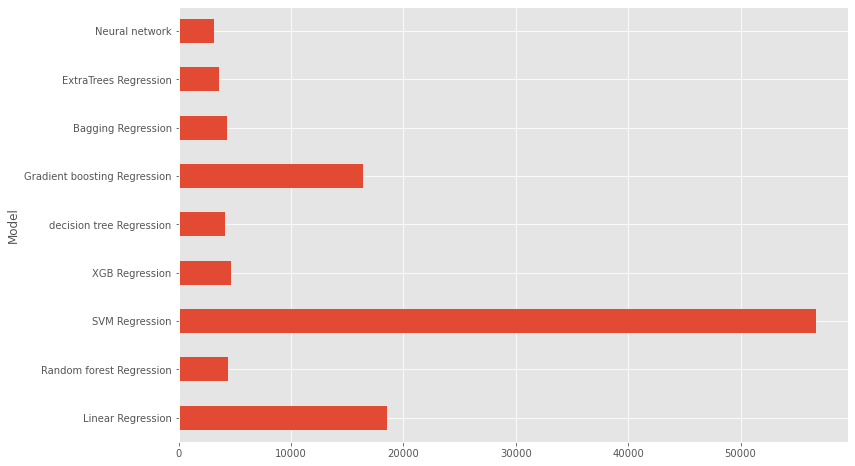

In [85]:
results_df.set_index('Model', inplace=True)
results_df['MAE'].plot(kind='barh', figsize=(12, 8))

# Observation:
    Neural network has lowest mae as compare to all other regressors
    

<AxesSubplot:ylabel='Model'>

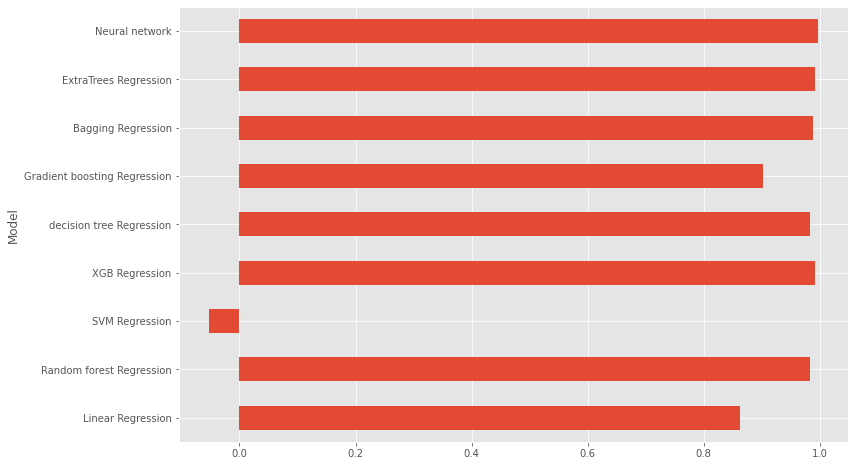

In [86]:
results_df['R2square'].plot(kind='barh', figsize=(12, 8))

# Test data predictions for best regressor i.g Neural network


In [87]:
predictions=pd.DataFrame([y_test,test_pred.ravel()]).T
predictions.columns=['Actual','Predicted']
predictions['Error']=(predictions['Actual']-predictions['Predicted'])**2
print('mean square error',predictions['Error'].mean())
predictions

mean square error 18352352.328160886


Actual      Predicted         Error
0      167753.59770  165622.531250  4.541444e+06
1      142034.36730  142297.609375  6.929639e+04
2      161402.26250  166451.156250  2.549133e+07
3      175662.51090  176886.250000  1.497537e+06
4      136557.23690  135998.078125  3.126585e+05
...             ...            ...           ...
15023  216700.34010  213991.875000  7.335783e+06
15024  200551.78390  198579.046875  3.891691e+06
15025   94739.20609  100262.382812  3.050548e+07
15026  143996.92850  139914.718750  1.666444e+07
15027  138747.14180  139089.484375  1.171984e+05

[15028 rows x 3 columns]

In [88]:
predictions.to_csv('best_model_predicionts.csv')

In [89]:
import joblib

In [90]:
#model has been saved
joblib.dump(r,"House Price Predictor")

['House Price Predictor']

In [91]:
#import pickle
#with open('r', 'wb') as files:
    #pickle.dump(model, files)

#import json
#columns={
    #'data_columns' : [col.lower() for col in X.columns]
#}
#with open("columns.json","w") as file:
    #file.write(json.dumps(columns))

In [92]:
from tkinter import *
import joblib

In [94]:
def show_entry_fields():
    p1=str(e1.get())
    p2=str(e2.get())

    model = joblib.load("House Price Predictor")
    result = model.predictions([[p1,p2]])
    print("The predicted price is: ",result)
    

master =Tk()
master.title("Predicting House Prices")

label = Label(master, text= "House price prediction using machine learning", bg="black",fg="white").grid(row = 0, columnspan=2)

Label(master, text="RegionName").grid(row=1)
Label(master, text="AreaCode").grid(row=2)

e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

Button(master, text = 'Predict', command = show_entry_fields).grid()

mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/macbook/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/c_/0bbsdc813v1024stkjm4628h0000gn/T/ipykernel_16375/3604089167.py", line 6, in show_entry_fields
    result = model.predictions([[p1,p2]])
AttributeError: 'History' object has no attribute 'predictions'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/macbook/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/c_/0bbsdc813v1024stkjm4628h0000gn/T/ipykernel_16375/3604089167.py", line 6, in show_entry_fields
    result = model.predictions([[p1,p2]])
AttributeError: 'History' object has no attribute 'predictions'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/macbook/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return se